## Tips dataset
This notebook will focus on basic data preprocessing/cleaning and then finally 3 types of modelling 
### Linear Regression
### Binomial Regression
### Poisson Regression

#### Data (tips) information

Description: Food servers’ tips in restaurants may be influenced by many
factors, including the nature of the restaurant, size of the party, and table
locations in the restaurant. Restaurant managers need to know which factors
matter when they assign tables to food servers. For the sake of staff morale,
they usually want to avoid either the substance or the appearance of unfair
treatment of the servers.

*Variable Explanation:*
* **total_bill:** Total bill (cost of the meal), including tax, in US dollars
* **tip:** Tip (gratuity) in US dollars
* **sex:** Sex of person paying for the meal (male, female)
* **smoker:** Smoker in party? (No, Yes)
* **day:** Thur, Fri, Sat, Sun
* **time:** Day, Night
* **size:** Size of the party

Reference: https://link.springer.com/chapter/10.1007%2F978-0-387-71762-3_7

# 1. Import data

In [1]:
#Import first few essential libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url1 = "https://assets.datacamp.com/production/repositories/666/datasets/b064fa9e0684a38ac15b0a19845367c29fde978d/tips.csv"
tips = pd.read_csv(url1)

tips.sample(6)

,total_bill,tip,sex,smoker,day,time,size
83,32.68,5.00,Male,Yes,Thur,Lunch,2
72,26.86,3.14,Female,Yes,Sat,Dinner,2
54,25.56,4.34,Male,No,Sun,Dinner,4
234,15.53,3.00,Male,Yes,Sat,Dinner,2
162,16.21,2.00,Female,No,Sun,Dinner,3
11,35.26,5.00,Female,No,Sun,Dinner,4


In [3]:
# drop sex, smoker and day features
tips.drop(['sex','smoker','day'], axis='columns', inplace=True)
tips.sample(6)

,total_bill,tip,time,size
102,44.30,2.50,Dinner,3
41,17.46,2.54,Dinner,2
3,23.68,3.31,Dinner,2
70,12.02,1.97,Dinner,2
224,13.42,1.58,Lunch,2
48,28.55,2.05,Dinner,3


# 2. Data information & Descriptive statistics

In [4]:
#total_bill and tip can be used as label for linear regression model 
#size would be appropriate for Poisson regression for it's designe to predict integers
#time(whose unique categories are binary, namely Lunch and Dinner) can be modelled by Biomial
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   time        244 non-null    object 
 3   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB


In [5]:
# Some fundamental stats about the features
# the ranges are quite different. On a dataset this size, scaling wouldn't hurt. It may improve accuracy if it isn't already high
# time is not listed due to its object type. Once encoded, it will be presented as 0 for Lunch and 1 for Dinner
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
# Mini preprocessing

# Replacement dictionary input
reps={'Lunch':0,'Dinner':1}
# Add encoded version of time feature
tips['timeEnc']=tips['time'].replace(reps)

tips.sample(6)

,total_bill,tip,time,size,timeEnc
7,26.88,3.12,Dinner,4,1
86,13.03,2.00,Lunch,2,0
89,21.16,3.00,Lunch,2,0
20,17.92,4.08,Dinner,2,1
61,13.81,2.00,Dinner,2,1
156,48.17,5.00,Dinner,6,1


# 3. EDA

## 3.1 General numeric overview

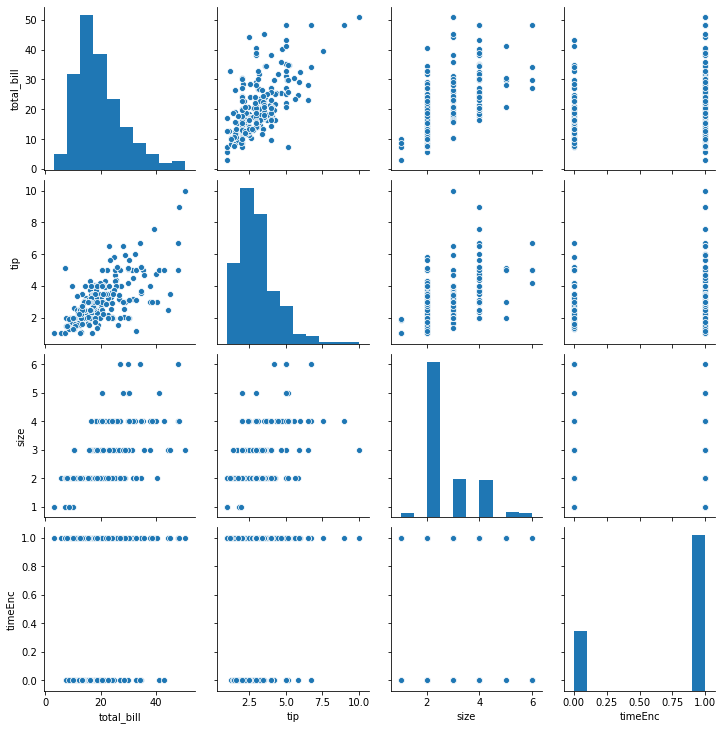

<Figure size 432x288 with 0 Axes>

In [7]:
# Main info to take from this figure is the histograms of each numerical feature
# We can say that the first 2 feature have basically a Normal distribution (or to be more exact, Gamma distribution right skew)
# 
sns.pairplot(tips)
plt.show()
plt.clf()

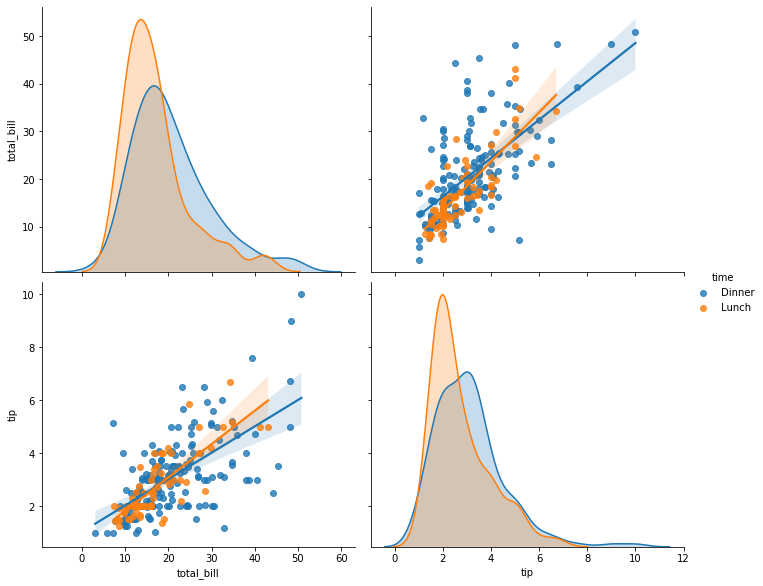

<Figure size 432x288 with 0 Axes>

In [8]:
# Main info to take from this figure is the difference in distributions between the 2 classess
# Usually, the more different the distributions, the better for classifying
sns.pairplot(tips.drop(['size','timeEnc'], axis='columns'), hue='time', kind='reg', height=4, aspect=1.2)
plt.show()
plt.clf()

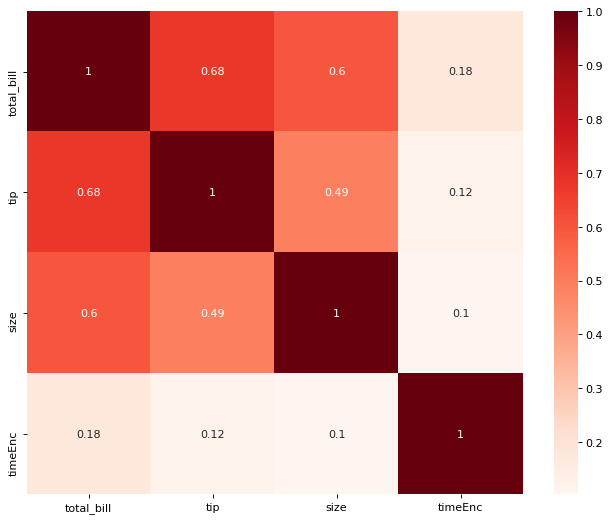

<Figure size 432x288 with 0 Axes>

In [9]:
# A heat map of the correlation matrix can help decide which features to drop.
# It is usally bad to have features that are highly correlated because it makes de model redundant.
# Ideally you want the features to be only correlated with the target variable (if the target is not discrete).
# If the target is discrete, avoide picking features that are correlated. However, this may be difficult with discrete features.
plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(tips.corr(), annot=True, cmap="Reds")
plt.show()
plt.clf()

Data Correlation: Is a way to understand the relationship between multiple variables and attributes in your dataset.

If your dataset has perfectly positive or negative attributes then there is a high chance that the performance of the model will be impacted by a problem called — “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted trees algorithms are immune to multicollinearity by nature. When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or Linear Regression are not immune to that problem and you should fix it before training the model.

#### How Can I Deal With This Problem?
There are multiple ways to deal with this problem. The easiest way is to delete or eliminate one of the perfectly correlated features. Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).

['total_bill' 'tip' 'size']
Which feature distribution would you like to see?(e.i: 0, 1, 2): 0


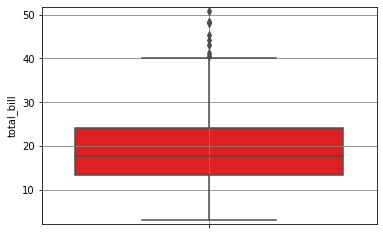

<Figure size 432x288 with 0 Axes>

In [10]:
# Visualize feature distribution
dropColumns=['time','timeEnc']
tipsNum=tips.drop(dropColumns, axis='columns')
print(tipsNum.columns.values)
c=input('Which feature distribution would you like to see?(e.i: 0, 1, 2): ')
c=tipsNum.columns[int(c)]
sns.boxplot(data=tipsNum, y=c, color='red')
plt.grid(True, color='gray')
plt.ylim(np.min(tips[c])-1,np.max(tips[c])+1)
plt.show()
plt.clf()

['total_bill' 'tip' 'size']
Which feature distribution would you like to see?(e.i: 0, 1, 2): 0


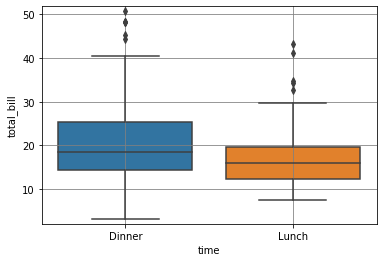

<Figure size 432x288 with 0 Axes>

In [11]:
# Visualize feature distribution with respect to time
dropColumns=['time','timeEnc']
tipsNum=tips.drop(dropColumns, axis='columns')
print(tipsNum.columns.values)
c=input('Which feature distribution would you like to see?(e.i: 0, 1, 2): ')
c=tipsNum.columns[int(c)]
tipsNumL = pd.concat([tipsNum, tips[dropColumns[0]]], axis='columns', sort=False)
sns.boxplot(data=tipsNumL, y=c, x=dropColumns[0])
plt.grid(True, color='gray')
plt.ylim(np.min(tips[c])-1,np.max(tips[c])+1)
plt.show()
plt.clf()
tipsNumL = pd.concat([tipsNumL, tips[dropColumns[1]]], axis='columns', sort=False)

# 3 Cleaning data (just outliers)

In [12]:
from scipy import stats

"The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured." - Wikipedia

calculating the Z-score you re-scale and center the data (mean of 0 and standard deviation of 1) and look for the instances which are too far from zero. These data points that are way too far from zero are treated as the outliers. In most common cases the threshold of 3 or -3 is used. In example, say the Z-score value is greater than or less than 3 or -3 respectively. This data point will then be identified as an outlier.

## 3.1 Filtering out outliers

In [13]:
tipsNumL.sample(6)

,total_bill,tip,size,time,timeEnc
15,21.58,3.92,2,Dinner,1
132,11.17,1.50,2,Lunch,0
57,26.41,1.50,2,Dinner,1
33,20.69,2.45,4,Dinner,1
103,22.42,3.48,2,Dinner,1
114,25.71,4.00,3,Dinner,1


In [26]:
z = np.abs(stats.zscore(tipsNum))
threshold = input('Pick the threshold in standard deviations: ')
threshold=float(threshold)
drops = np.where(z > threshold)
tipsNumClean=tipsNumL.drop(drops[0],axis='rows')
tipsNumClean=tipsNumClean[['total_bill','tip','size','timeEnc','time']]

Pick the threshold in standard deviations: 2


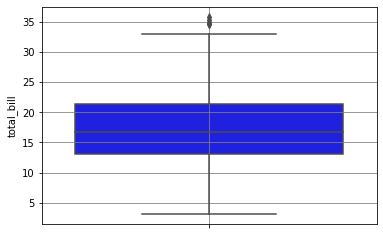

<Figure size 432x288 with 0 Axes>

In [15]:
c=tipsNumClean.columns[0]
sns.boxplot(data=tipsNumClean, y=c, color='blue')
plt.grid(True, color='gray')
# plt.ylim(np.min(tipsNumClean[c])-1,np.max(tipsNumClean[c])+1)
plt.show()
plt.clf()

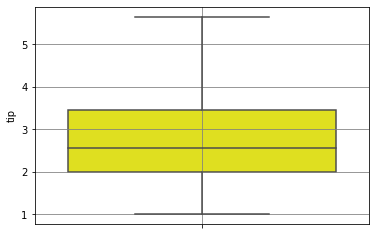

<Figure size 432x288 with 0 Axes>

In [16]:
c=tipsNumClean.columns[1]
sns.boxplot(data=tipsNumClean, y=c, color='yellow')
plt.grid(True, color='gray')
# plt.ylim(np.min(tipsNumClean[c])-1,np.max(tipsNumClean[c])+1)
plt.show()
plt.clf()

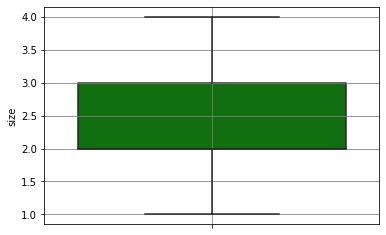

<Figure size 432x288 with 0 Axes>

In [17]:
c=tipsNumClean.columns[2]
sns.boxplot(data=tipsNumClean, y=c, color='green')
plt.grid(True, color='gray')
# plt.ylim(np.min(tipsNumClean[c])-1,np.max(tipsNumClean[c])+1)
plt.show()
plt.clf()

# 4. Modeling and evaluation

In [18]:
# import libraries
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

## 4.1 Predicting total_bill(tip, size) with LinearRegression

In [19]:
# Fit a linear model. Huge difference when you remove the intercept!!!
model_lm = ols(formula = 'total_bill ~ tip + size - 1',
               data = tipsNumClean).fit()

# View model coefficients
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             total_bill   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              1532.
Date:                Mon, 27 Jul 2020   Prob (F-statistic):                   2.53e-128
Time:                        15:19:27   Log-Likelihood:                         -654.78
No. Observations:                 218   AIC:                                      1314.
Df Residuals:                     216   BIC:                                      1320.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tip            3.3479      0.317     10.561      0.000       2.723       3.973
size           3.5542      0.373      9.536      0.000       2.820       4.289
==============================================================================
Omnibus:                       50.324   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.994
Skew:                           1.058   Prob(JB):                     6.49e-26
Kurtosis:                       5.880   Cond. No.                         5.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print('R2 model: {:.3f}\nMeanSquaredError model: {:.3f}\n'.format(model_lm.rsquared,model_lm.mse_total/len(tipsNumClean)))

R2 model: 0.934
MeanSquaredError model: 1.657



In [21]:
x=tipsNumClean.drop(['total_bill'], axis='columns')
y=tipsNumClean[['total_bill']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

train=pd.concat([x_train, y_train], axis='columns', sort=False)
model_lm1 = ols(formula = 'total_bill ~ tip + size - 1', data = train).fit()

test=pd.concat([x_test, y_test], axis='columns', sort=False)
model_lm2 = ols(formula = 'total_bill ~ tip + size - 1', data = test).fit()

print('R2 model1: {:.3f}\nMeanSquaredError model1: {:.3f}\n'.format(model_lm1.rsquared,model_lm1.mse_total/len(y_train)))
print('R2 model2: {:.3f}\nMeanSquaredError model2: {:.3f}\n'.format(model_lm2.rsquared,model_lm2.mse_total/len(y_test)))

R2 model1: 0.936
MeanSquaredError model1: 3.436

R2 model2: 0.933
MeanSquaredError model2: 3.194



## 4.2 BinomialRegression time(total_bill) dropped Intercept

In [22]:
from statsmodels.formula.api import glm
import statsmodels.api as sm

# Fit a GLM
model_br = glm(formula = 'time ~ total_bill - 1',
               data = tipsNumClean,
                family = sm.families.Binomial()).fit()

model_br.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Generalized Linear Model Regression Results                        
===========================================================================================
Dep. Variable:     ['time[Dinner]', 'time[Lunch]']   No. Observations:                  218
Model:                                         GLM   Df Residuals:                      217
Model Family:                             Binomial   Df Model:                            0
Link Function:                               logit   Scale:                          1.0000
Method:                                       IRLS   Log-Likelihood:                -125.38
Date:                             Mon, 27 Jul 2020   Deviance:                       250.76
Time:                                     15:19:27   Pearson chi2:                     216.
No. Iterations:                                  4                                         
Covariance Type:                         nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.0564      0.009      6.525      0.000       0.039       0.073
==============================================================================
"""

## 4.3 PoissonRegression size(total_bill) dropped Intercept

In [23]:
from statsmodels.formula.api import glm
import statsmodels.api as sm

# Fit a GLM
model_pr = glm(formula = 'size ~ total_bill',
               data = tipsNumClean,
                family = sm.families.Poisson()).fit()

model_pr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   size   No. Observations:                  218
Model:                            GLM   Df Residuals:                      216
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -314.87
Date:                Mon, 27 Jul 2020   Deviance:                       32.046
Time:                        15:19:27   Pearson chi2:                     33.5
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4563      0.127      3.589      0.000       0.207       0.706
total_bill     0.0225      0.006      3.560      0.000       0.010       0.035
==============================================================================
"""

# 5. Some extra EDA that could have been done

For this analysis, we'll use all features available

In [24]:
tipsAll = pd.read_csv(url1)
tipsAll.sample(6)

,total_bill,tip,sex,smoker,day,time,size
91,22.49,3.50,Male,No,Fri,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
20,17.92,4.08,Male,No,Sat,Dinner,2
228,13.28,2.72,Male,No,Sat,Dinner,2
159,16.49,2.00,Male,No,Sun,Dinner,4
170,50.81,10.00,Male,Yes,Sat,Dinner,3


### Mini-EDA (selection1)

Isolated Friday, Saturday and Sunday with the features shown below (view sample and description):

In [84]:
selection1 = tipsAll.drop(['sex','smoker','size','time'], axis='columns').query('day == "Fri" or day == "Sat" or day == "Sun"')

In [85]:
selection1.sample(6)

,total_bill,tip,day
190,15.69,1.50,Sun
41,17.46,2.54,Sun
103,22.42,3.48,Sat
172,7.25,5.15,Sun
55,19.49,3.51,Sun
107,25.21,4.29,Sat


In [86]:
selection1.describe()

,total_bill,tip
count,182.000000,182.000000
mean,20.502418,3.075549
std,9.132871,1.424157
min,3.070000,1.000000
25%,13.955000,2.000000
50%,18.195000,3.000000
75%,25.157500,3.607500
max,50.810000,10.000000


We can visualize the distribution in terms of approximate mean, deviation shape, and around which bin is the most frequent **total_bill** and **tip**

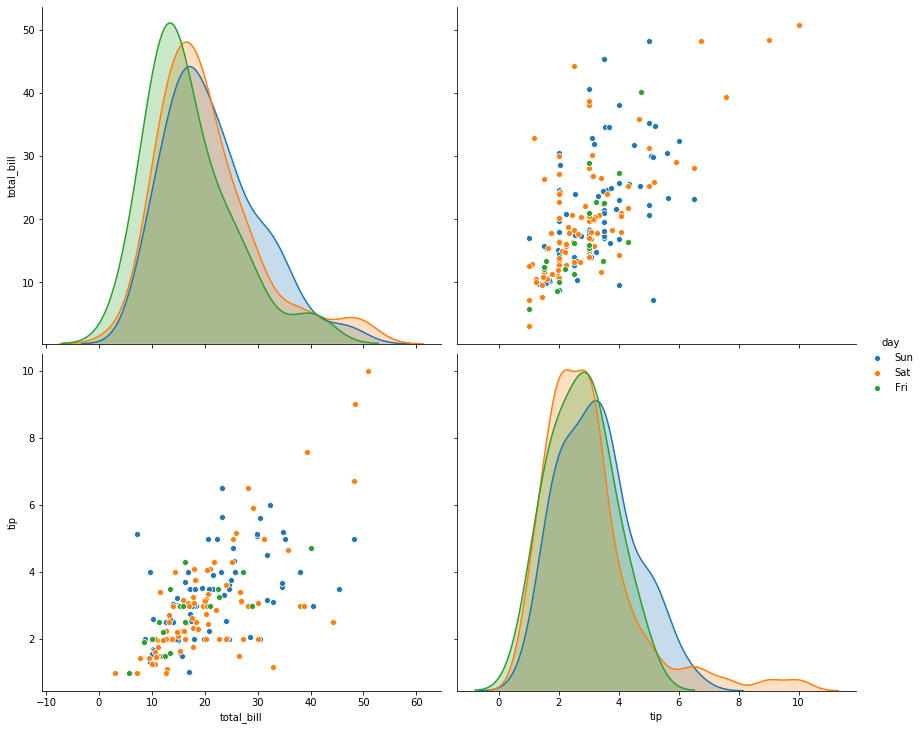

<Figure size 432x288 with 0 Axes>

In [76]:
sns.pairplot(selection1, hue='day', height=5, aspect=1.2)
plt.show()
plt.clf()

Here we can get a more empirical view with swarmplot in addition to the boxplot:

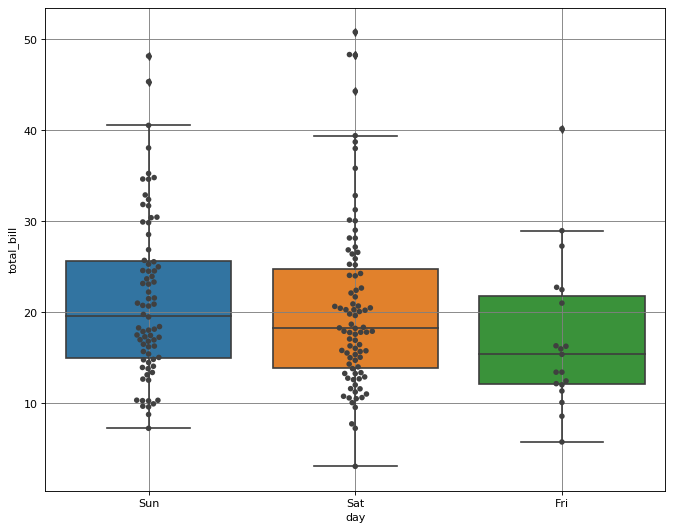

<Figure size 432x288 with 0 Axes>

In [54]:
plt.figure(figsize=(10,8),dpi=80)
sns.boxplot(x="day", y="total_bill", data=selection1)
ax = sns.swarmplot(x="day", y="total_bill", data=selection1, color=".25")
plt.grid(True, color='gray')
plt.show()
plt.clf()

### Mini EDA (selection2) 

Thursday, Friday, Saturday and Sunday with the features shown below (view sample and description):

In [87]:
selection2 = tipsAll.drop(['size'], axis='columns') #.query('day == "Fri" or day == "Sat" or day == "Sun"')

In [92]:
selection2.sample(6)

,total_bill,tip,sex,smoker,day,time
72,26.86,3.14,Female,Yes,Sat,Dinner
136,10.33,2.00,Female,No,Thur,Lunch
152,17.26,2.74,Male,No,Sun,Dinner
205,16.47,3.23,Female,Yes,Thur,Lunch
11,35.26,5.00,Female,No,Sun,Dinner
202,13.00,2.00,Female,Yes,Thur,Lunch


In [93]:
selection2.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


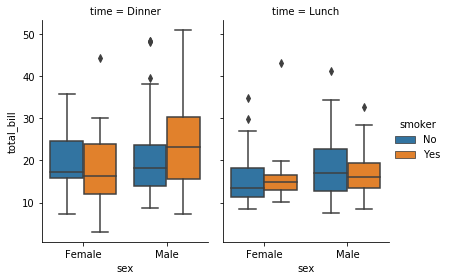

<Figure size 432x288 with 0 Axes>

In [88]:
sns.catplot(x="sex", y="total_bill", hue="smoker", col="time", data=selection2, kind="box", height=4, aspect=.7);
plt.show()
plt.clf()

### Mini EDA (selection3)

Isolated Friday, Saturday and Sunday with the features shown below (view sample and description)::

In [60]:
selection3 = tipsAll.drop(['sex','size','time'], axis='columns').query('day == "Fri" or day == "Sat" or day == "Sun"')

In [80]:
selection3.sample(6)

,total_bill,tip,smoker,day
171,15.81,3.16,Yes,Sat
91,22.49,3.50,No,Fri
156,48.17,5.00,No,Sun
19,20.65,3.35,No,Sat
14,14.83,3.02,No,Sun
17,16.29,3.71,No,Sun


In [79]:
selection3.describe()

,total_bill,tip
count,182.000000,182.000000
mean,20.502418,3.075549
std,9.132871,1.424157
min,3.070000,1.000000
25%,13.955000,2.000000
50%,18.195000,3.000000
75%,25.157500,3.607500
max,50.810000,10.000000


What was observed with respect to **smoker** for each **day** of the weekend:

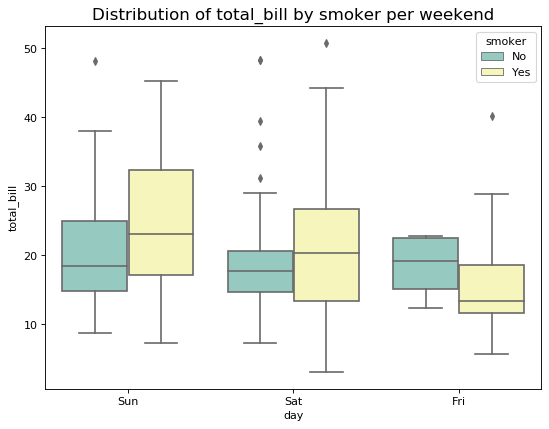

<Figure size 432x288 with 0 Axes>

In [91]:
plt.figure(figsize=(8,6),dpi=80)
sns.boxplot(x="day", y="total_bill", hue="smoker", data=selection3, palette="Set3")
plt.title("Distribution of total_bill by smoker per weekend", fontsize=15)
plt.show()
plt.clf()